# Importing Necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df1=pd.read_csv("/content/drive/MyDrive/feynn labs/Indian automoble buying behavour.csv")
df2=pd.read_csv("/content/drive/MyDrive/feynn labs/ev market data.csv")
df3=pd.read_csv("/content/drive/MyDrive/feynn labs/EVStats.csv")

In [4]:
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [5]:
df2.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [6]:
df2.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [7]:
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)


DF1 Shape:  (99, 13)
DF2 Shape:  (103, 15)


In [8]:
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<

In [9]:
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


'<<< DATASET 2 >>>'

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,51.000000,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,29.877528,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,0.000000,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,25.500000,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,51.000000,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,76.500000,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,102.000000,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [10]:
df1.isna().sum()

,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Personal loan,0
House Loan,0
Wife Working,0
Salary,0
Wife Salary,0


In [11]:
df2.isna().sum()

,0
Unnamed: 0,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0


#Data Frame 1

In [12]:
df1.size

1287

In [13]:
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


## EDA

In [14]:
print(df1.dtypes)


Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object


<Axes: ylabel='Age'>

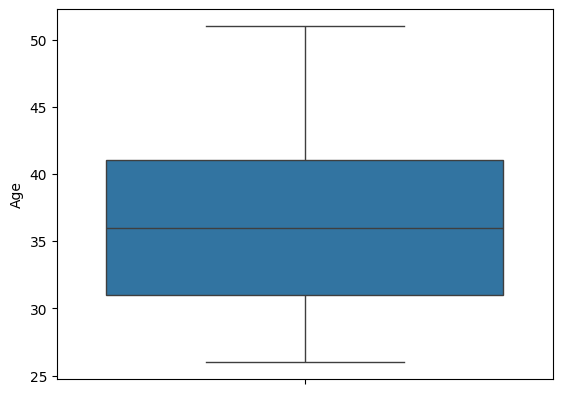

In [15]:
sns.boxplot(df1['Age'])

In [16]:
df1['Profession'].value_counts()

,count
Profession,
Salaried,64
Business,35


<Axes: xlabel='Profession', ylabel='Count'>

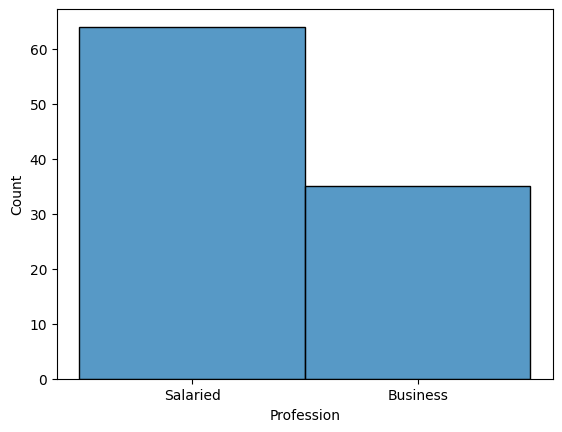

In [17]:
sns.histplot(df1['Profession'])

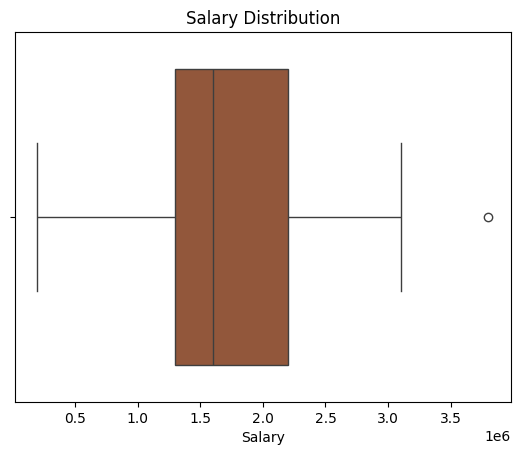

In [18]:
sns.boxplot(data=df1, x='Salary', color="sienna")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.show()

In [19]:
df1['Marrital Status'].value_counts()

,count
Marrital Status,
Married,84
Single,15


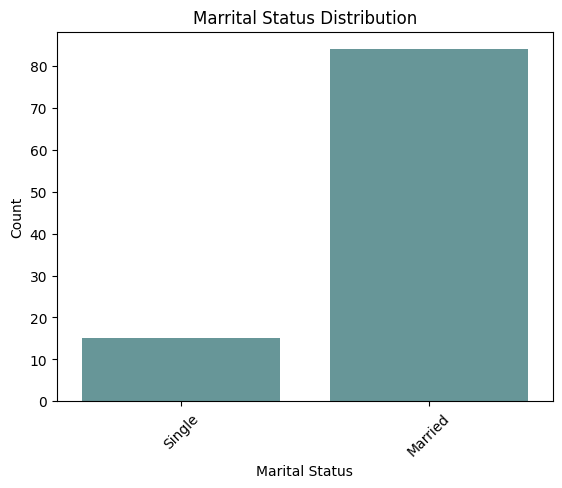

In [20]:
sns.countplot(data=df1, x='Marrital Status', color="cadetblue")
plt.title("Marrital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [21]:
df1['No of Dependents'].value_counts()

,count
No of Dependents,
3,34
2,29
0,22
4,14


In [22]:
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [23]:
df1['Wife Working'].value_counts()

,count
Wife Working,
Yes,52
No,46
m,1


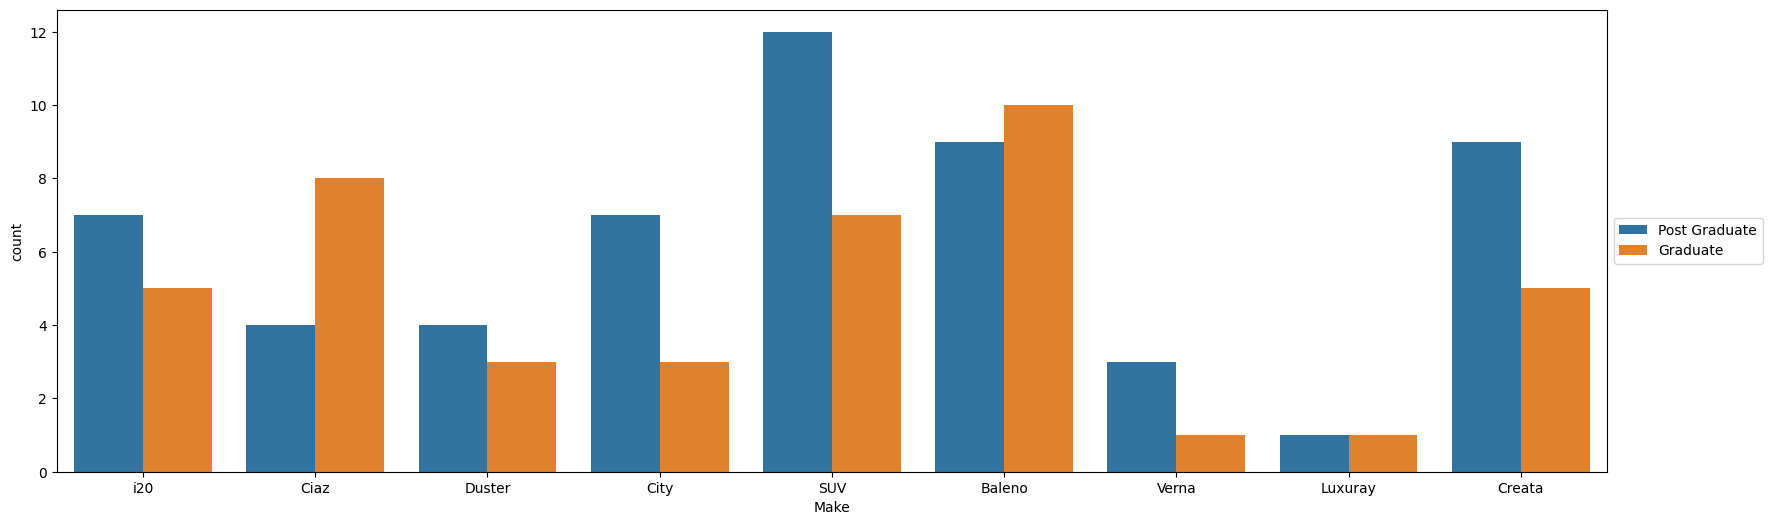

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df1, hue="Education")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [25]:
df1['Personal loan'].value_counts()

,count
Personal loan,
No,67
Yes,32


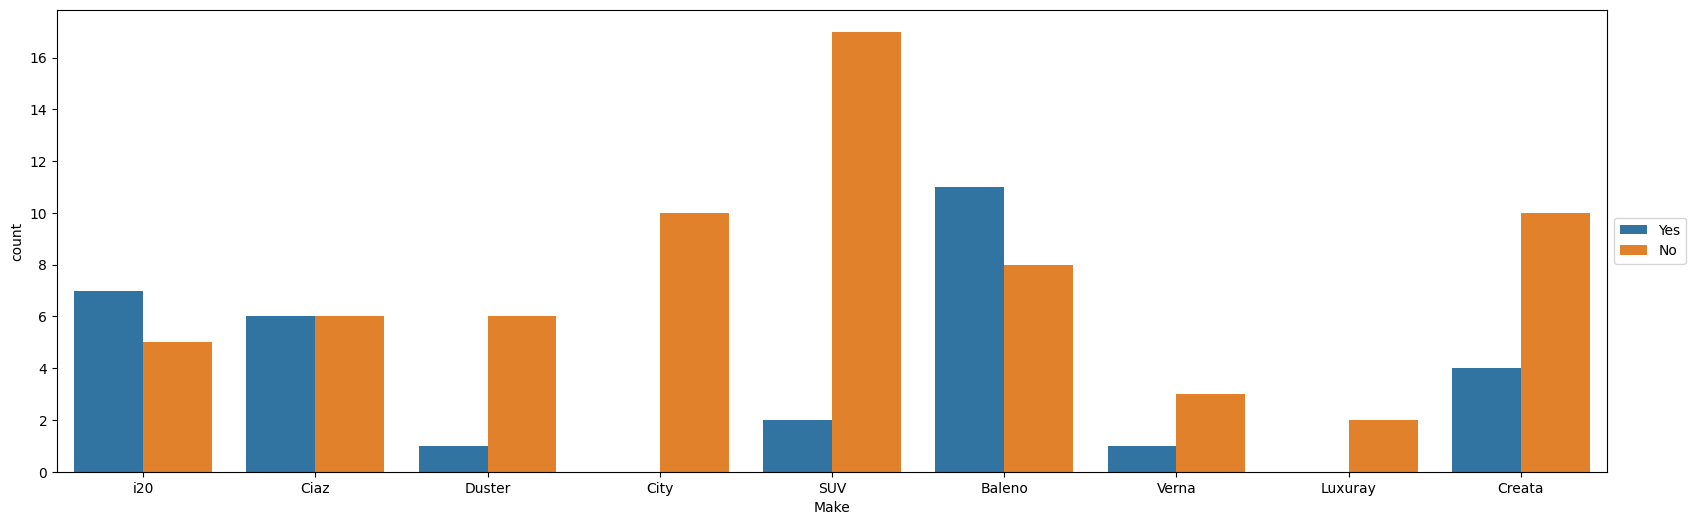

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df1, hue="Personal loan")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

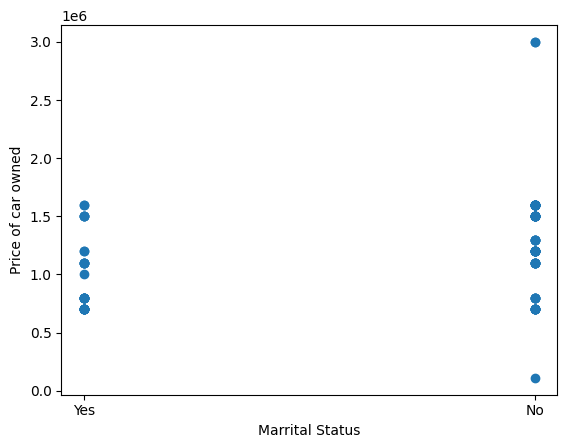

In [27]:
plt.xlabel('Marrital Status')
plt.ylabel('Price of car owned')
plt.scatter(df1['Personal loan'],df1['Price'])

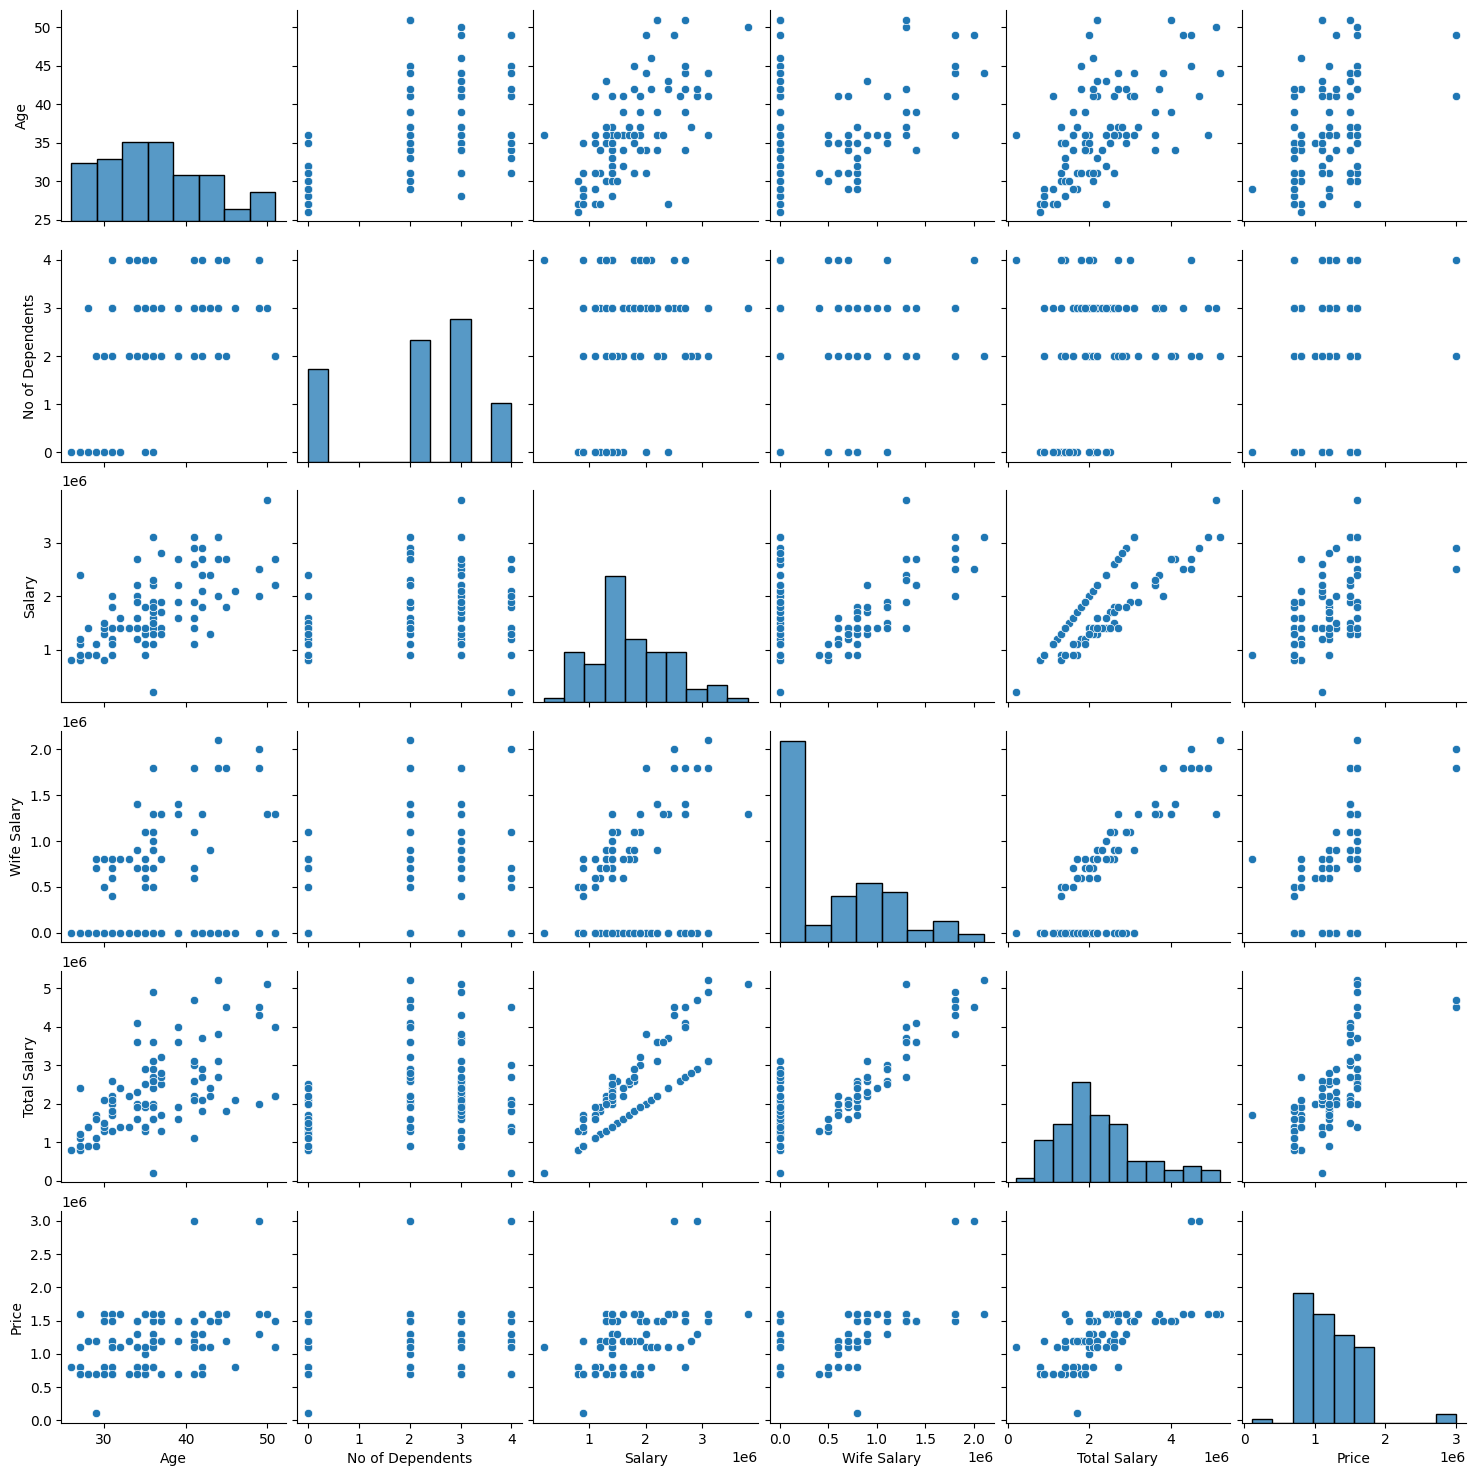

In [28]:
attributes_to_visualize = ['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                           'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                           'Total Salary', 'Make', 'Price']

sns.pairplot(df1[attributes_to_visualize])
plt.show()

# Demographic analysis

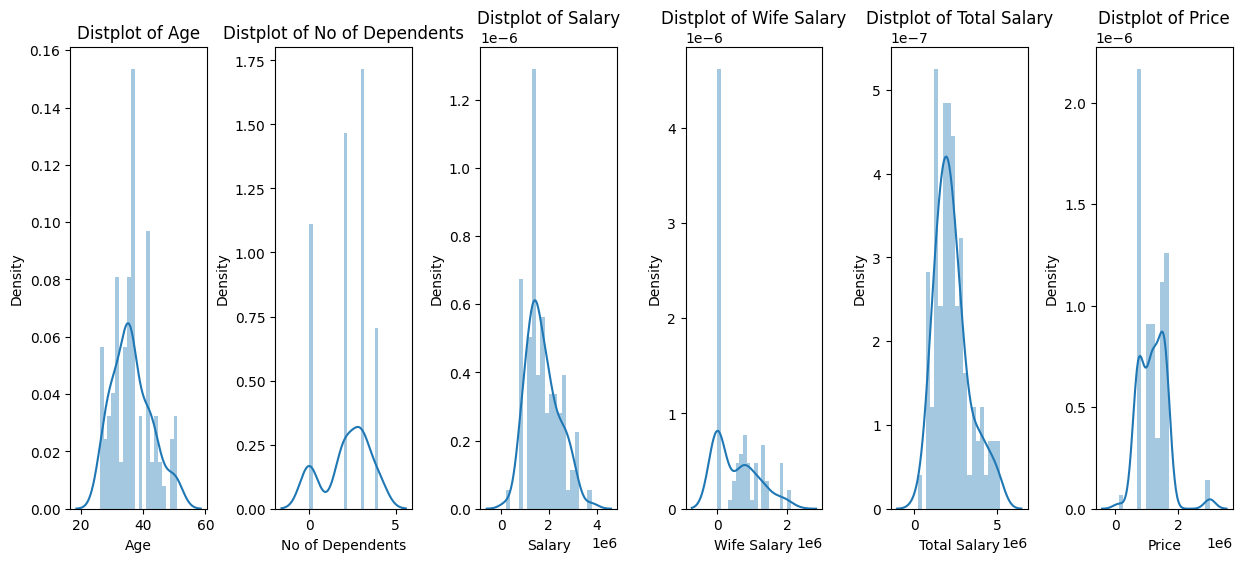

In [29]:
# Plotting for int64 dtype columns
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Salary'  ,'Wife Salary'  ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df1[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

# Geographic Analysis

In [30]:
df3.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


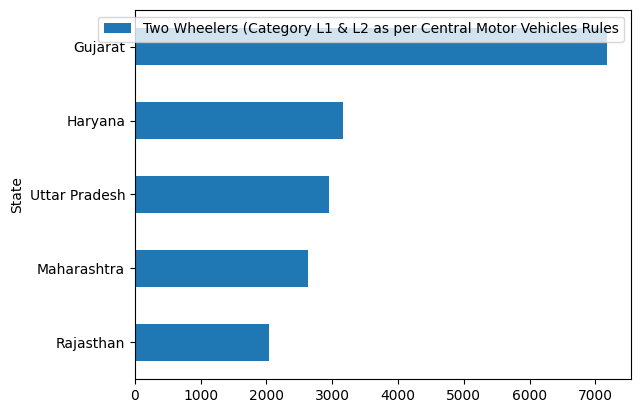

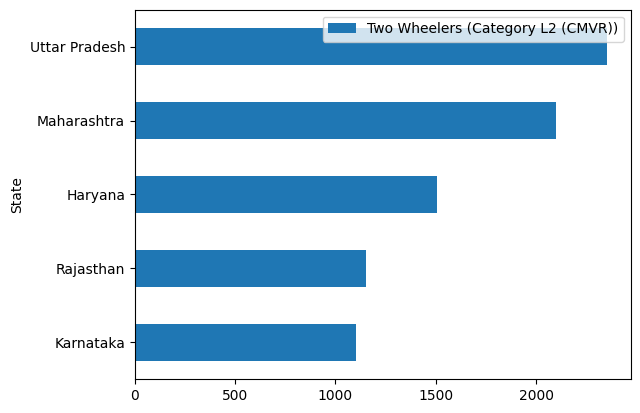

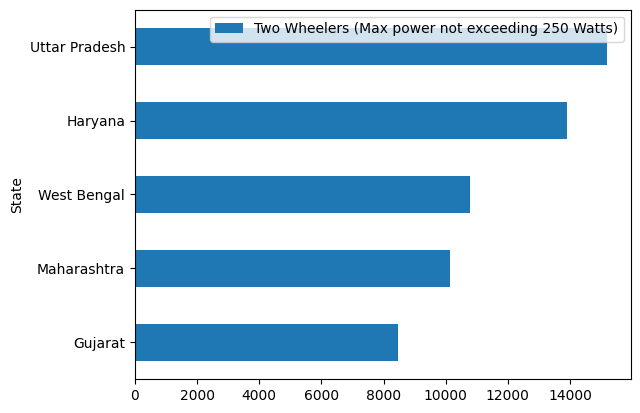

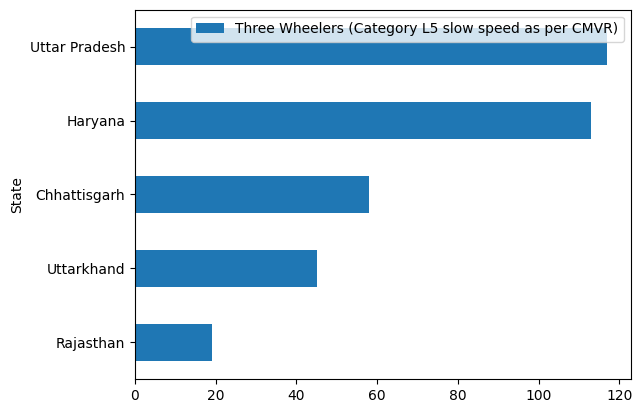

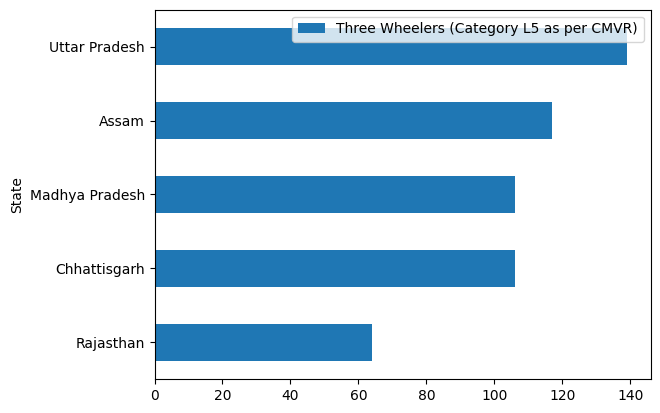

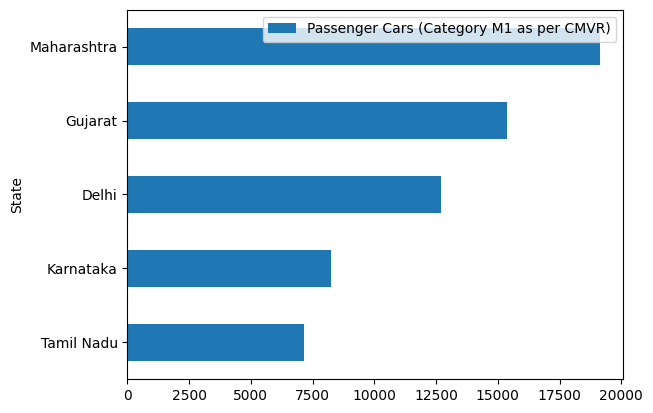

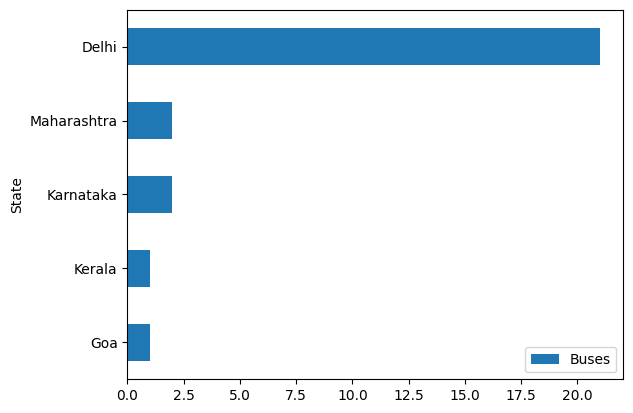

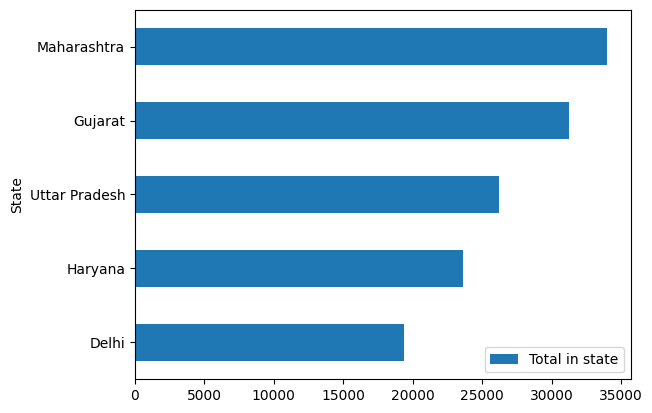

In [31]:
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  ax = df3.sort_values(y, ascending=True).tail(5).plot.barh(x='State', y=y)

#Data Frame 2

## EDA

In [32]:
df2.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [33]:
df2.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [34]:
df2.isna().sum()

,0
Unnamed: 0,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0


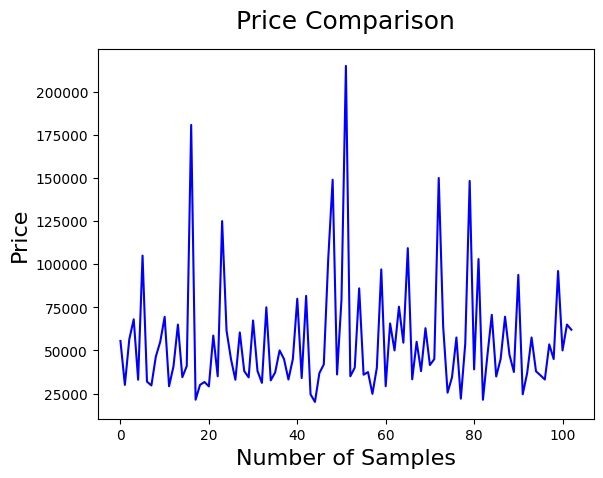

In [35]:
plt.plot(df2['PriceEuro'], color='blue')
plt.xlabel('Number of Samples', size=16)
plt.ylabel('Price', size=16)
plt.title('Price Comparison', size=18, pad=15);

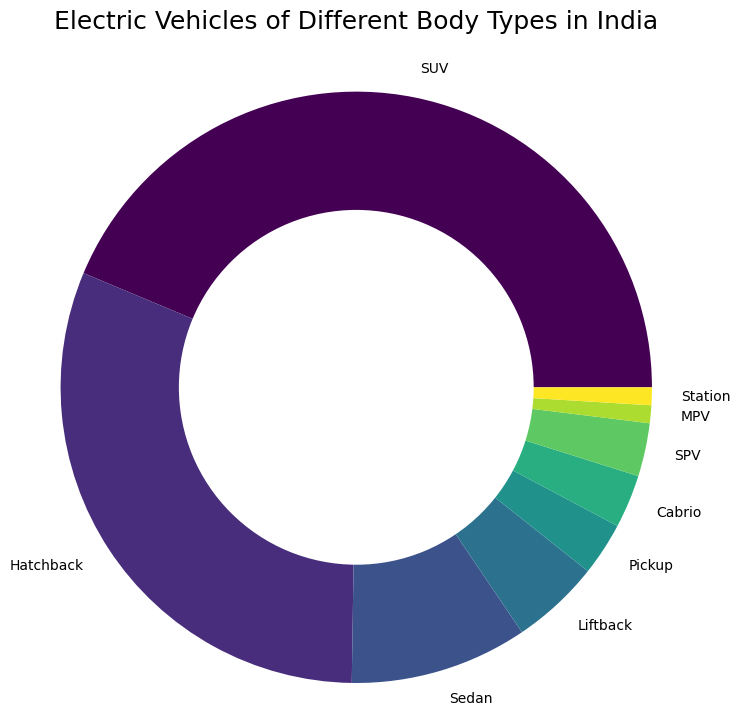

In [36]:
x = df2['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict())
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', size=18, pad=125)
plt.ylabel('')
plt.show()

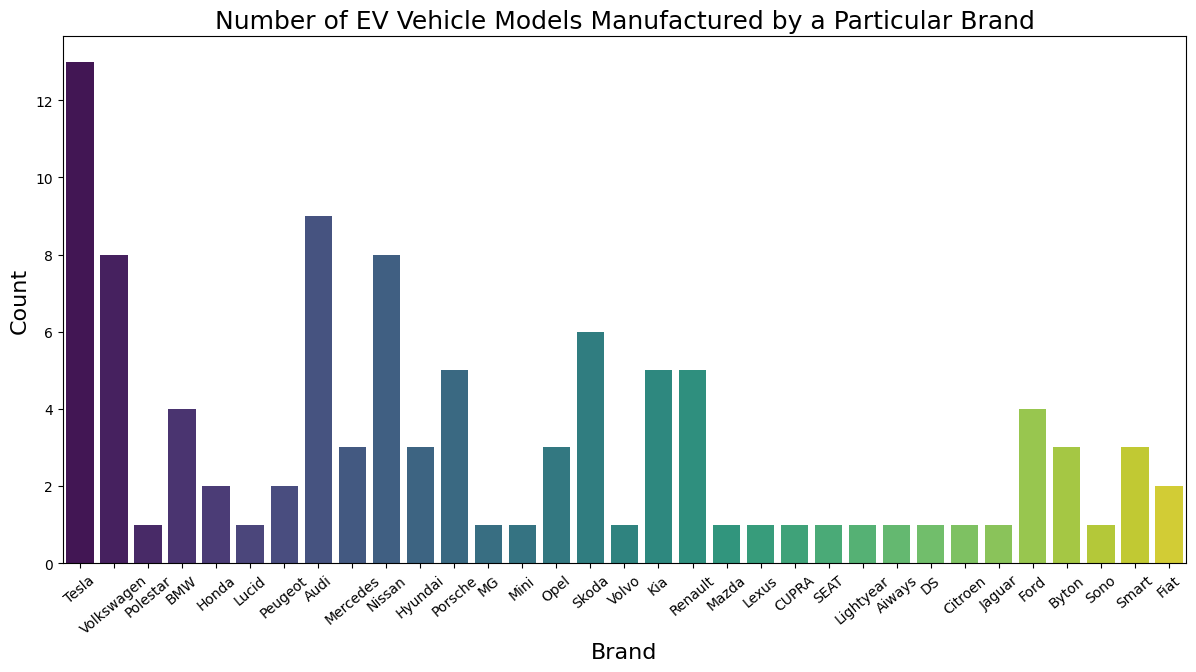

In [37]:
sns.catplot(data=df2, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand', size=16)
plt.ylabel('Count', size=16)
plt.xticks()
plt.yticks()
plt.title('Number of EV Vehicle Models Manufactured by a Particular Brand', size=18)
plt.show()


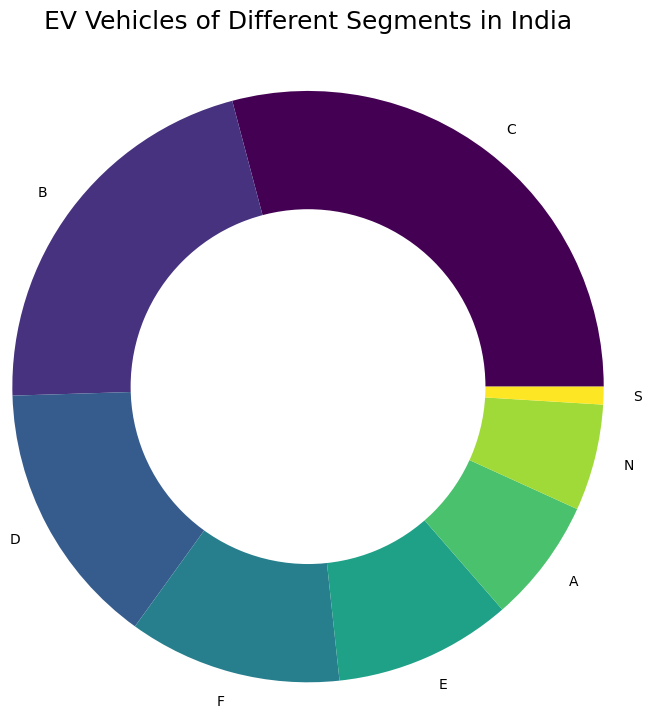

In [38]:
x = df2['Segment'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='EV Vehicles of Different Segments in India', size=18, pad=125)
plt.ylabel('')
plt.show()

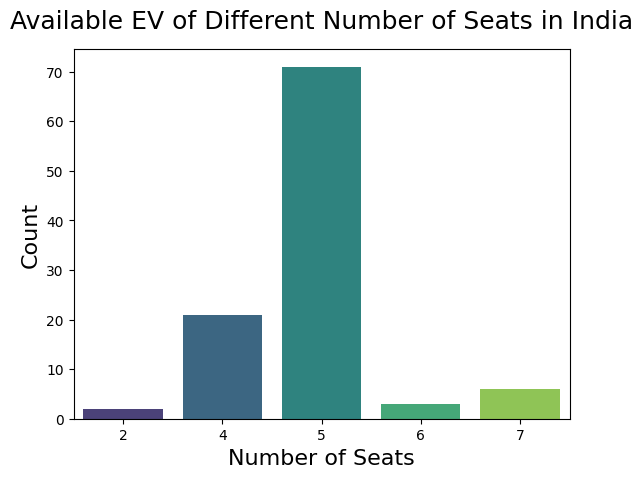

In [39]:
sns.countplot(data=df2, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', size=16)
plt.ylabel('Count', size=16)
plt.xticks()
plt.yticks()
plt.title(label='Available EV of Different Number of Seats in India', size=18, pad=15)
plt.show()

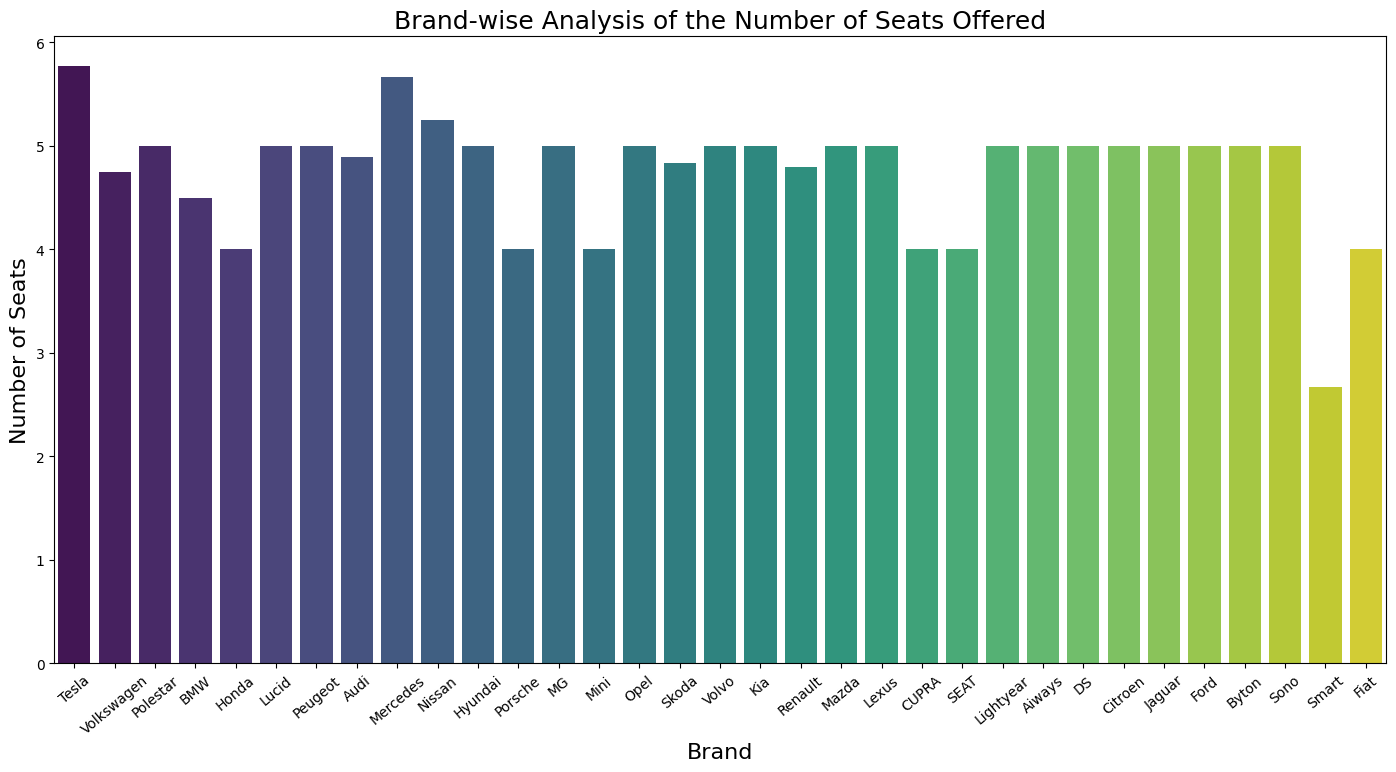

In [40]:
sns.catplot(kind='bar', data=df2, x='Brand', y='Seats', palette='viridis', ci=None, height=7, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand', size=16)
plt.ylabel('Number of Seats',  size=16)
plt.xticks()
plt.yticks()
plt.title('Brand-wise Analysis of the Number of Seats Offered',  size=18);

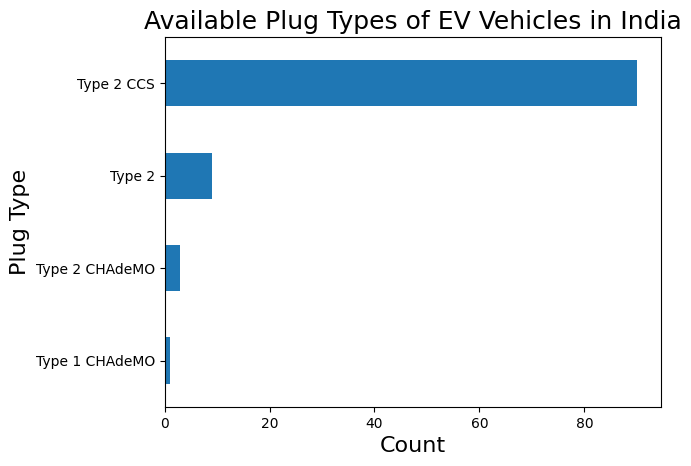

In [41]:
df2['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count',  size=16)
plt.ylabel('Plug Type', size=16)
plt.xticks()
plt.yticks()
plt.title('Available Plug Types of EV Vehicles in India', size=18)
plt.show()

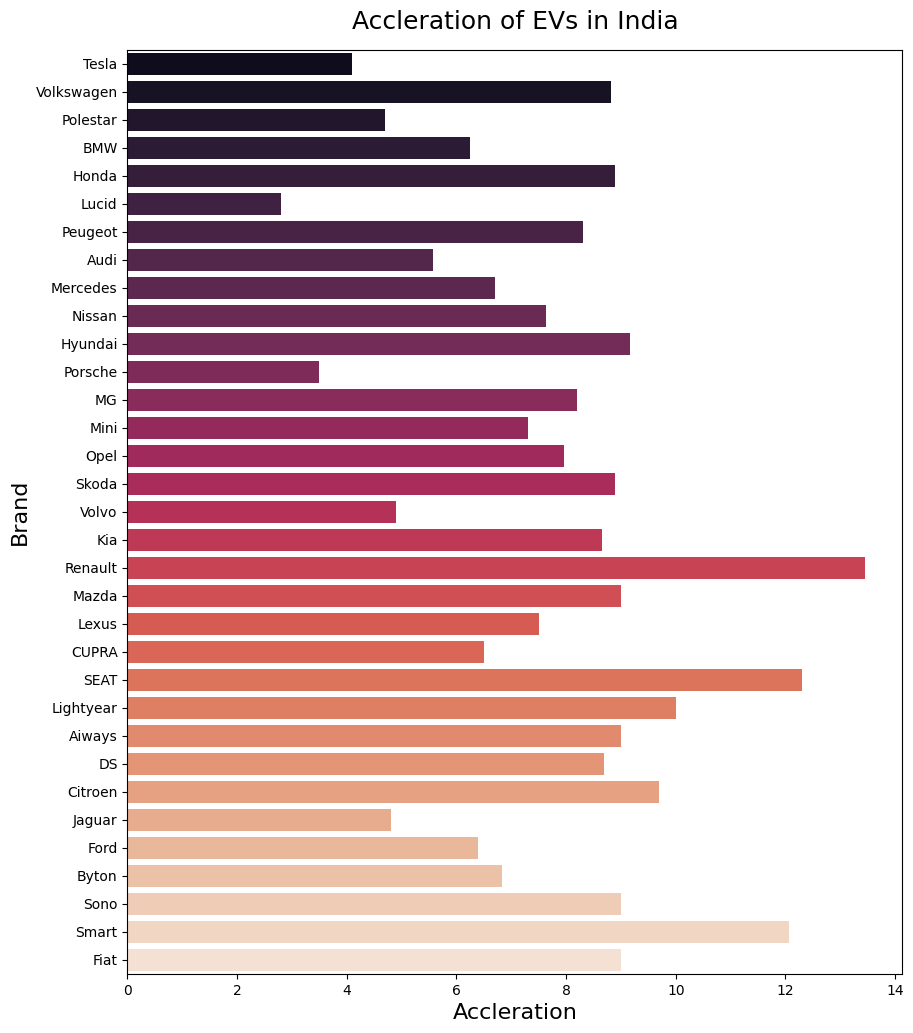

In [42]:
plt.figure(figsize=(10, 12))
sns.barplot(data=df2, y='Brand', x='AccelSec', ci=None, palette="rocket")
plt.xticks()
plt.yticks()
plt.xlabel('Accleration', size=16)
plt.ylabel('Brand', size=16)
plt.title(label='Accleration of EVs in India', size=18, pad=15)
plt.show()

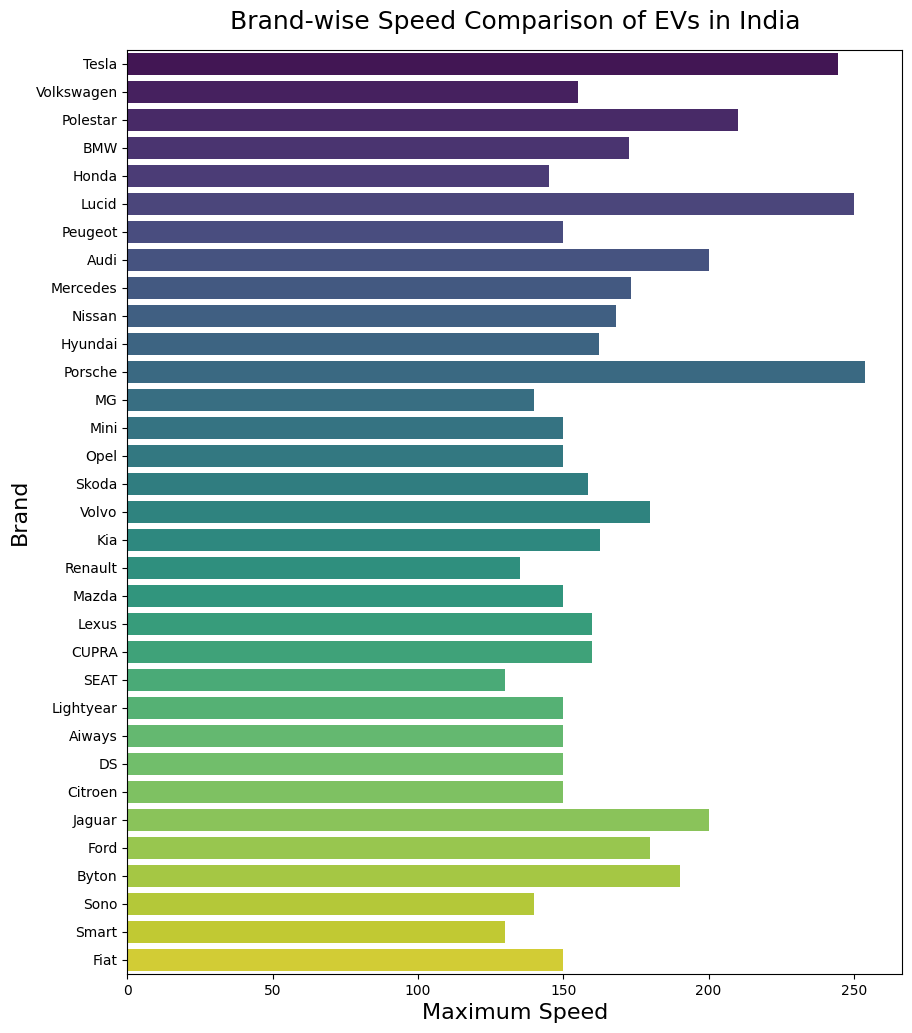

In [43]:
plt.figure(figsize=(10, 12))
sns.barplot(data=df2, x='TopSpeed_KmH', y='Brand', ci=None, palette='viridis')
plt.xticks()
plt.yticks()
plt.xlabel('Maximum Speed', size=16)
plt.ylabel('Brand', size=16)
plt.title(label='Brand-wise Speed Comparison of EVs in India', size=18, pad=15)
plt.show()

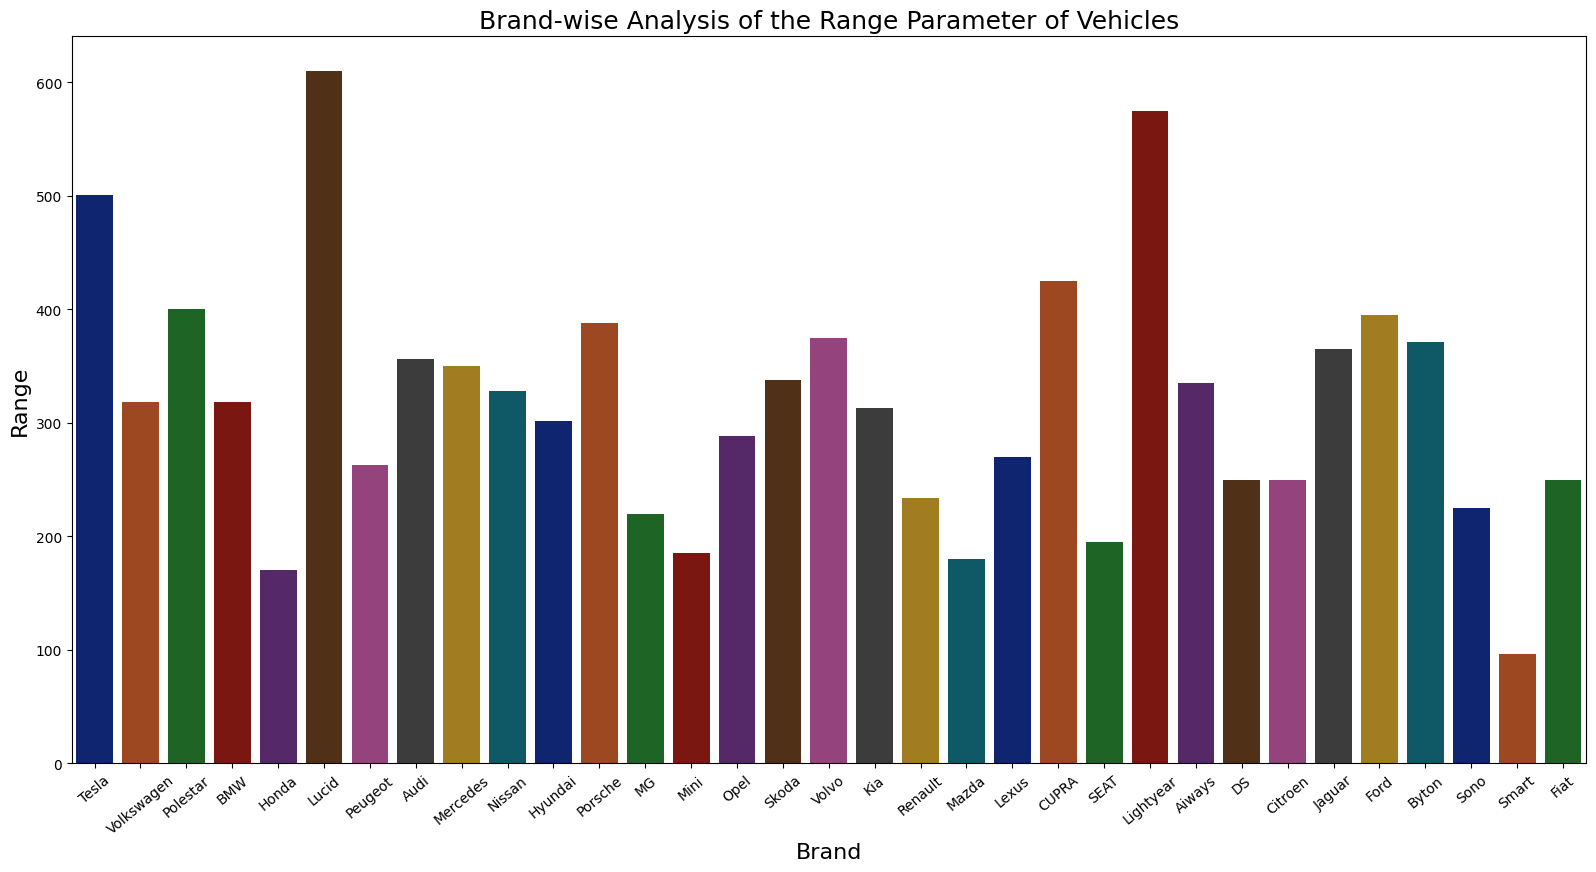

In [44]:
sns.catplot(kind='bar', data=df2, x='Brand', y='Range_Km', palette='dark', ci=None, height=8, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand', size=16)
plt.ylabel('Range', size=16)
plt.xticks()
plt.yticks()
plt.title('Brand-wise Analysis of the Range Parameter of Vehicles', size=18);

In [45]:
# PowerTrain feature
df2['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df2['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [46]:
X = df2[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.429225,-0.554599,1.147772,-0.882791,0.839988,-0.959297,0.998880
1,-2.322483,-0.345449,-0.896473,-1.305529,0.079598,0.235116,-0.213678
2,1.587851,0.008899,0.650523,0.041024,0.593537,-0.698248,0.058718
3,0.291018,-0.000150,0.307702,-0.514196,-1.608861,0.291624,0.364999
4,-2.602679,-0.626489,0.888088,0.585294,-0.802108,0.027387,-0.084955


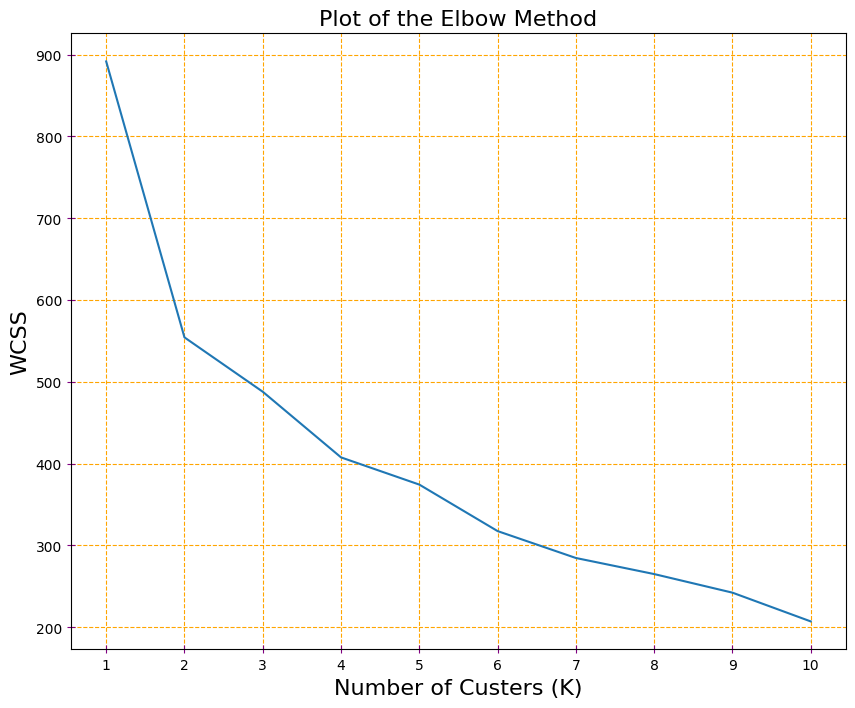

In [83]:
# plotting the results of Elbow

wc = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wc.append(kmean.inertia_)

plt.figure(figsize=(10,8))
plt.title('Plot of the Elbow Method', size=16 )
plt.plot(range(1, 11), wc)
plt.xticks(range(1, 11) )
plt.yticks()
plt.xlabel('Number of Custers (K)', size=16 , )
plt.ylabel('WCSS',  size=16 )
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='orange', grid_linestyle='--');


In [78]:
kmean = KMeans(n_clusters=3, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=3, random_state=90)

In [79]:
print(kmean.labels_)

[1 2 1 0 2 1 2 2 0 1 1 2 0 0 2 0 1 2 2 2 2 1 2 1 1 0 0 1 2 2 1 0 2 1 2 0 2
 0 2 1 1 2 1 2 2 0 2 1 1 2 1 1 2 0 1 2 2 2 2 1 2 1 0 1 0 1 2 1 2 1 2 1 1 1
 2 2 1 2 1 1 0 1 2 0 0 2 0 1 1 0 1 2 2 1 2 0 2 0 0 1 1 1 1]


In [80]:
pd.Series(kmean.labels_).value_counts()

,count
1,41
2,40
0,22


In [81]:
df2['clusters'] = kmean.labels_

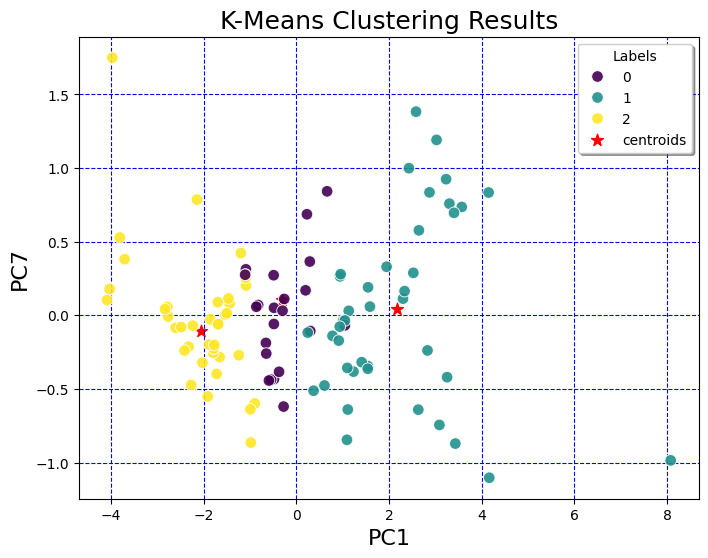

In [82]:
# visualizing clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC7', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1',  size=16)
plt.ylabel('PC7', size=16)
plt.xticks()
plt.yticks()
plt.grid()
plt.tick_params(grid_color='blue', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', size=18)
plt.show()

#END